**Abstract**
1. Load data & Explore data
2. Preprocess data
3. Modeling : Configuration A, D, keras model (pretrained), (not pretrained)
4. Evaluate the model  
Appendix. FC layers to Conv.layers

## 1. Load data & Explore data

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import copy

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/논문/VggNet')

In [5]:
# Load cifar-100 datasets

(X_train, y_train), (X_test_full, y_test_full) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 11s 0us/step


In [6]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(5000, 32, 32, 3)
(5000, 1)
(5000, 32, 32, 3)
(5000, 1)


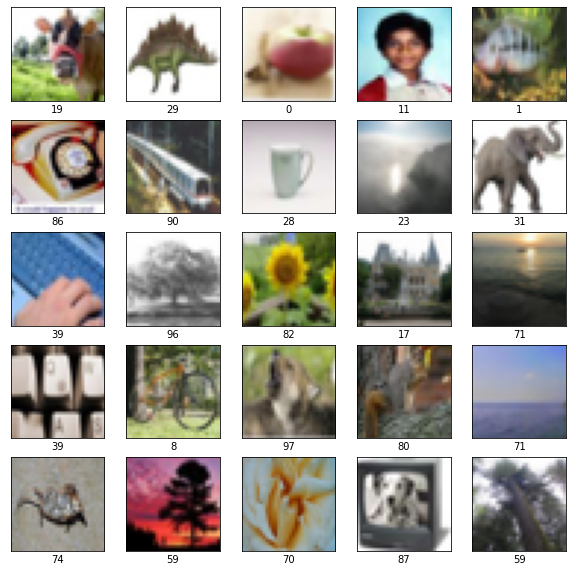

In [8]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',  
#                'dog', 'frog', 'horse', 'ship', 'truck']           # This code is for cifar10 datasets

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i][0])
plt.show()

## 2. Preprocess data

In [9]:
# Normalize pixel values to be between 0 and 1
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0 ,X_test / 255.0

## 3. Modeling

In [10]:
l2 = kernel_regularizer=keras.regularizers.l2(5 * pow(10, -4))

#### Configuration A

In [11]:
model_A = Sequential([
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2, input_shape=(32, 32, 3)),
    layers.MaxPool2D(2),
    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

In [12]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0

In [13]:
model_A.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy',  metrics='accuracy')

In [105]:
history_A = model_A.fit(X_train, y_train, batch_size=256, epochs=75, validation_data=(X_valid, y_valid))

Epoch 1/75
196/196 [==============================] - 9s 38ms/step - loss: 5.7933 - accuracy: 0.0098 - val_loss: 5.7588 - val_accuracy: 0.0152
Epoch 2/75
196/196 [==============================] - 7s 37ms/step - loss: 5.7478 - accuracy: 0.0107 - val_loss: 5.7142 - val_accuracy: 0.0242
Epoch 3/75
196/196 [==============================] - 7s 37ms/step - loss: 5.7036 - accuracy: 0.0111 - val_loss: 5.6710 - val_accuracy: 0.0166
Epoch 4/75
196/196 [==============================] - 7s 37ms/step - loss: 5.6608 - accuracy: 0.0139 - val_loss: 5.6283 - val_accuracy: 0.0206
Epoch 5/75
196/196 [==============================] - 7s 37ms/step - loss: 5.6181 - accuracy: 0.0134 - val_loss: 5.5769 - val_accuracy: 0.0148
Epoch 6/75
196/196 [==============================] - 7s 37ms/step - loss: 5.5449 - accuracy: 0.0141 - val_loss: 5.4182 - val_accuracy: 0.0232
Epoch 7/75
196/196 [==============================] - 7s 37ms/step - loss: 5.3933 - accuracy: 0.0243 - val_loss: 5.2508 - val_accuracy: 0.0348

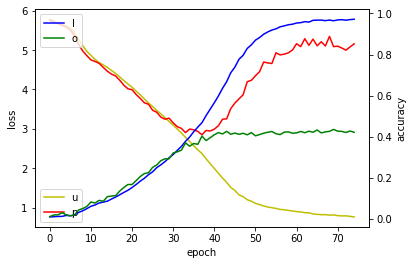

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history_A.history['loss'], 'y', label='train loss')
loss_ax.plot(history_A.history['val_loss'], 'r', label='valid loss')

acc_ax.plot(history_A.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history_A.history['val_accuracy'], 'g', label='valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend('upper left')
acc_ax.legend('lower left')

plt.show()

#### Configuration D (VGG-16)

In [47]:
model_D = Sequential([
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2, input_shape=(32, 32, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

In [99]:
model_D.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 256)        

In [33]:
# Compare with pretrained keras VggNet model

from tensorflow.keras.applications.vgg16 import VGG16
keras_model = VGG16()
keras_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
model_D.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy',  metrics='accuracy')

In [49]:
history_D = model_D.fit(X_train, y_train, batch_size=256, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
196/196 [==============================] - 13s 60ms/step - loss: 6.5220 - accuracy: 0.0090 - val_loss: 6.4669 - val_accuracy: 0.0100
Epoch 2/200
196/196 [==============================] - 12s 59ms/step - loss: 6.4489 - accuracy: 0.0116 - val_loss: 6.3952 - val_accuracy: 0.0100
Epoch 3/200
196/196 [==============================] - 12s 59ms/step - loss: 6.3780 - accuracy: 0.0093 - val_loss: 6.3264 - val_accuracy: 0.0096
Epoch 4/200
196/196 [==============================] - 12s 59ms/step - loss: 6.3097 - accuracy: 0.0099 - val_loss: 6.2601 - val_accuracy: 0.0110
Epoch 5/200
196/196 [==============================] - 12s 59ms/step - loss: 6.2442 - accuracy: 0.0094 - val_loss: 6.1964 - val_accuracy: 0.0118
Epoch 6/200
196/196 [==============================] - 12s 59ms/step - loss: 6.1811 - accuracy: 0.0098 - val_loss: 6.1352 - val_accuracy: 0.0098
Epoch 7/200
196/196 [==============================] - 12s 59ms/step - loss: 6.1205 - accuracy: 0.0093 - val_loss: 6.0763 - val_ac

### Keras model (pretrained)

In [ ]:
# If input shape is (224, 224, 3), run this code (only add Dropout layer)

# updated_model = Sequential()
# for layer in keras_model.layers:  # loop through layers, add Dropout after layers 'fc1' and 'fc2'
#     updated_model.add(layer)
#     if layer.name in ['fc1', 'fc2']:
#         updated_model.add(Dropout(.2))

In [55]:
keras_model = VGG16(input_shape=(32, 32, 3), include_top=False)
keras_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [56]:
updated_model = Sequential()
for layer in keras_model.layers:
    updated_model.add(layer)

updated_model.add(layers.Flatten())
updated_model.add(layers.Dense(4096, activation='relu'))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(4096, activation='relu'))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(100, activation='softmax'))

In [57]:
updated_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [58]:
updated_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy',  metrics='accuracy')

In [59]:
history_keras = updated_model.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
196/196 [==============================] - 12s 59ms/step - loss: 4.1439 - accuracy: 0.0708 - val_loss: 2.7480 - val_accuracy: 0.2938
Epoch 2/100
196/196 [==============================] - 11s 58ms/step - loss: 2.5949 - accuracy: 0.3125 - val_loss: 2.0395 - val_accuracy: 0.4396
Epoch 3/100
196/196 [==============================] - 11s 58ms/step - loss: 2.0148 - accuracy: 0.4390 - val_loss: 1.8664 - val_accuracy: 0.4794
Epoch 4/100
196/196 [==============================] - 11s 58ms/step - loss: 1.7225 - accuracy: 0.5147 - val_loss: 1.7966 - val_accuracy: 0.5118
Epoch 5/100
196/196 [==============================] - 11s 58ms/step - loss: 1.4666 - accuracy: 0.5754 - val_loss: 1.6460 - val_accuracy: 0.5550
Epoch 6/100
196/196 [==============================] - 11s 58ms/step - loss: 1.2556 - accuracy: 0.6317 - val_loss: 1.6510 - val_accuracy: 0.5556
Epoch 7/100
196/196 [==============================] - 11s 58ms/step - loss: 1.0858 - accuracy: 0.6767 - val_loss: 1.5696 - val_ac

### Keras model (not pretrained)

In [60]:
keras_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights=None)
keras_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [61]:
updated_model = Sequential()
for layer in keras_model.layers:
    updated_model.add(layer)

updated_model.add(layers.Flatten())
updated_model.add(layers.Dense(4096, activation='relu'))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(4096, activation='relu'))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(100, activation='softmax'))

In [62]:
updated_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [63]:
updated_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy',  metrics='accuracy')

In [ ]:
history_keras = updated_model.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
196/196 [==============================] - 12s 59ms/step - loss: 4.6053 - accuracy: 0.0096 - val_loss: 4.6051 - val_accuracy: 0.0122
Epoch 2/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6053 - accuracy: 0.0103 - val_loss: 4.6052 - val_accuracy: 0.0122
Epoch 3/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6053 - accuracy: 0.0099 - val_loss: 4.6052 - val_accuracy: 0.0098
Epoch 4/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6053 - accuracy: 0.0099 - val_loss: 4.6052 - val_accuracy: 0.0114
Epoch 5/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6053 - accuracy: 0.0100 - val_loss: 4.6051 - val_accuracy: 0.0102
Epoch 6/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6053 - accuracy: 0.0099 - val_loss: 4.6051 - val_accuracy: 0.0090
Epoch 7/100
196/196 [==============================] - 11s 58ms/step - loss: 4.6054 - accuracy: 0.0099 - val_loss: 4.6052 - val_ac

## 4. Evaluate the model

In [ ]:
model_A.evaluate(X_test, y_test)

157/157 [==============================] - 1s 6ms/step - loss: 5.3839 - accuracy: 0.4050


[5.38393497467041, 0.4050000011920929]

## Appendix. FC layers to Conv.layers (for testing)

In [ ]:
# Save and Load

model_A.save('models/model_A.h5')

In [64]:
model_A = load_model('models/model_A.h5')

In [65]:
# Make test model (with pretrained model except dense layers)

test_model_A = Sequential()
for layer in model_A.layers[:-6]:
    test_model_A.add(layer)

In [66]:
test_model_A.add(layers.Conv2D(4096, 1, activation='relu'))

In [67]:
test_model_A.add(layers.Conv2D(100, 1, activation='softmax'))

In [68]:
test_model_A.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 256)        

In [83]:
# Check dim of weights for Conv. layer

len(test_model_A.layers[-2].get_weights())  # W, b -> 2

2

In [84]:
test_model_A.layers[-2].get_weights()[0].shape  # dim of W

(1, 1, 512, 4096)

In [85]:
test_model_A.layers[-2].get_weights()[1].shape  # dim of b

(4096,)

In [92]:
# Check dim of weights for Dense layer

len(model_A.layers[-4].get_weights()) 

2

In [93]:
model_A.layers[-4].get_weights()[0].shape  # dim of W

(512, 4096)

In [95]:
model_A.layers[-4].get_weights()[1].shape  # dim of b

(4096,)

In [79]:
# Conv layer -> Dense layer

weight1 = [model_A.layers[-4].get_weights()[0].reshape(1, 1, 512, 4096), model_A.layers[-4].get_weights()[1]]

In [80]:
test_model_A.layers[-2].set_weights(weight1)

In [96]:
model_A.evaluate(X_test, y_test)

157/157 [==============================] - 1s 6ms/step - loss: 5.3839 - accuracy: 0.4050


[5.38393497467041, 0.4050000011920929]